In [1]:
#Sentiment Analysis of Restaurant Reviews

# Problem Statements

Normally, a lot of businesses are remained as failures due to lack of profit, lack of proper improvement measures. Mostly, restaurant owners face a lot of difficulties to improve their productivity. This project really helps those who want to increase their productivity, which in turn increases their business profits. This is the main objective of this project.

What the project does is that the restaurant owner gets to know about drawbacks of his restaurant such as most disliked food items of his restaurant by customer’s text review which is processed with ML classification algorithm(Naive Bayes)

The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression. In the end, we hope to find a "best" model for predicting the review's sentiment.

In [8]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Loading the dataset
df = pd.read_csv('review_data.tsv', delimiter='\t', quoting=3)

In [10]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [11]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [5]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

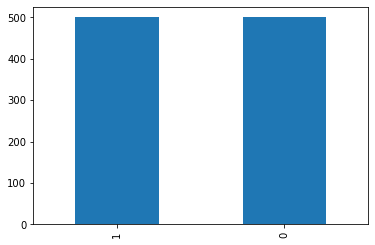

In [12]:
df['Liked'].value_counts().plot(kind='bar')
plt.show()

Preprocessing Dataset
Each review undergoes through a preprocessing step, where all the vague information is removed.

Removing the Stopwords, numeric and speacial charecters.
Normalizing each review using the approach of stemming.

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# clean review 

In [16]:
corpus=[]
for i in range(0,1000):
     # Cleaning special character from the reviews
    review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=df['Review'][i])
     # Converting the entire review into lower case
    review = review.lower()
     # Tokenizing the review by words
    review_words = review.split() 
    # romove stopwords
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    # stemming 
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    # join steming word
    review = ' '.join(review)
    corpus.append(review)
    
    
    

In [17]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

Vectorization

From the cleaned dataset, potential features are extracted and are converted to numerical format. The vectorization techniques are used to convert textual data to numerical format. Using vectorization, a matrix is created where each column represents a feature and each row represents an individual review.

In [18]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [19]:
# import pickle
# f=open('cv.pkl','wb')
# pickle.dump(cv1,f)

In [20]:
len(X)

1000

In [21]:
len(y)

1000

Training and Classification
Further the data is splitted into training and testing set using Cross Validation technique. This data is used as input to classification algorithm.

Classification Algorithms:

Algorithms like Decision tree, Support Vector Machine, Logistic Regression, Naive Bayes were implemented and on comparing the evaluation metrics two of the algorithms gave better predictions than others.

Multinomial Naive Bayes
Bernoulli Naive Bayes
Logistic Regression

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
#Multinomial NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier1= MultinomialNB(alpha=0.1)
classifier1.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier1.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[118  34]
 [ 34 114]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       152
           1       0.77      0.77      0.77       148

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



Accuracy is  77.33 %
Precision is  0.77
Recall is  0.77


In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

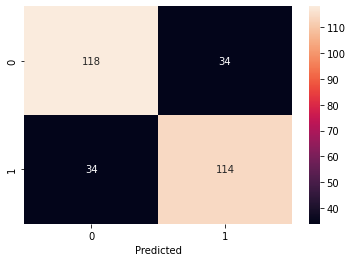

In [26]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.xlabel('Predicted')
plt.show()

In [49]:
# converting model into byte stream

In [50]:
# import pickle
# f=open('newmodel.pkl','wb')
# pickle.dump(classifier1,f)

In [51]:
#Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier2 = BernoulliNB(alpha=0.8)
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[114  38]
 [ 32 116]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       152
           1       0.75      0.78      0.77       148

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



Accuracy is  76.67 %
Precision is  0.75
Recall is  0.78


In [52]:
#Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier3 = linear_model.LogisticRegression(C=1.5)
classifier3.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[125  27]
 [ 43 105]]
Classification Report
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       152
           1       0.80      0.71      0.75       148

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



Accuracy is  76.67 %
Precision is  0.8
Recall is  0.71


In [53]:
a='good taste'
t=cv.transform([a])
res=classifier1.predict(t)
print(res)

[1]


In [54]:
if "not" in a:
    res[0] = abs(res[0]-1)
print(res[0])

1


In [55]:
#Analysis and Conclusion

In this study, an attempt has been made to classify sentiment analysis for restaurant reviews using machine learning techniques. Two algorithms namely Multinomial Naive Bayes and Bernoulli Naive Bayes are implemented.

Evaluation metrics used here are accuracy, precision and recall.


Using Multinomial Naive Bayes,
Accuracy of prediction is 77.33%.
Precision of prediction is 0.78.
Recall of prediction is 0.77.



Using Bernoulli Naive Bayes,
Accuracy of prediction is 76.67%.
Precision of prediction is 0.76.
Recall of prediction is 0.78.


Using Logistic Regression,
Accuracy of prediction is 76.67%.
Precision of prediction is 0.8.
Recall of prediction is 0.71.



From the above results, Multinomial Naive Bayes is slightly better method compared to Bernoulli Naive Bayes and Logistic Regression, with 77.33% accuracy which means the model built for the prediction of sentiment of the restaurant review gives 77.33% right prediction.